# Housing Prices | Supervised Machine Learning Methods using Python

**Supervised learning** is the area of Machine Learning where we have a set of independent variables which helps us to analyse the dependent variable and the relation between them. Whatever we want to predict is called as Dependent Variable, while variables that we use to predict are called as Independent Variables. 

So let’s start the process. Application of the entire things can be broken down into following parts:



*   1- Reading data & First glance
*   2- Data Pre-processing & Cleaning
*   3- Splitting Data into Training and Test Set
*   4- Applying algorithms
*   5- Comparing the accuracy scores



Now that we know about the dataset, let’s first talk about the Supervised algorithms that we are going to apply on the above dataset:

- Logistic Regression
- K-NN Algorithm
- Naive Bayes Theorem
- Linear Support Vector Machines
- Non-Linear Support Vector Machines
- Decision Trees
- Random Forest

## 1.Reading data & First glance

In [ ]:
#updating scikit-learn
!pip install scikit-learn --upgrade

# import libraries
import pandas as pd

# import data
url = "https://drive.google.com/file/d/1aSTX6fpypi6XtMJSFDxEPRgNHSypFwhQ/view?usp=share_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive',
       'MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu',
       'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MiscVal',
       'MoSold', 'YrSold', 'Id', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrTyp

In [ ]:
data.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,8450,65.0,856,3,0,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,9600,80.0,1262,3,1,0,2,298,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,11250,68.0,920,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,9550,60.0,756,3,1,0,3,0,0,0,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,14260,84.0,1145,4,1,0,3,192,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## 2.Data Pre-processing & Cleaning

We will start with the Data Preprocessing of Titanic Dataset. Preprocessing steps are given below:

1- Divide the Data into two Data Frames: Categorical & Numerical

2- Drop the columns from both the Data Frames

3- Take care of Null Values

4- For the Numerical Columns, we will plot the box plot and see if there are any outliers. Then we will replace the outliers from the data as well.

### 2.1 Divide the Data into two Data Frames: Categorical & Numerical

Categorical will contain all the columns from the data set which contain Categories. Numerical will contain all the columns containing Numbers.

In [ ]:
import numpy as np

data_cat = data.select_dtypes(object)
data_num = data.select_dtypes(np.number)

In [ ]:
data_cat.head()

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,ExterQual,ExterCond,BsmtQual,BsmtCond,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Feedr,GasA,Pave,Y,CBlock,TA,TA,Gd,TA,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Norm,GasA,Pave,Y,BrkTil,TA,TA,TA,Gd,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
data_num.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id
0,8450,65.0,856,3,0,0,2,0,0,0,...,8,2003.0,548,61,0,0,0,2,2008,1
1,9600,80.0,1262,3,1,0,2,298,0,0,...,6,1976.0,460,0,0,0,0,5,2007,2
2,11250,68.0,920,3,1,0,2,0,0,0,...,6,2001.0,608,42,0,0,0,9,2008,3
3,9550,60.0,756,3,1,0,3,0,0,0,...,7,1998.0,642,35,272,0,0,2,2006,4
4,14260,84.0,1145,4,1,0,3,192,0,0,...,9,2000.0,836,84,0,0,0,12,2008,5


### 2.2 Drop the columns from both the Data Frames

If:
a. Column is not important
b. Column contains more than 80% Null Values

Let’s First Look at the Categorical Data Frame.

We can drop the tickets column and name column as they are not important for making our model.

In [ ]:
data_cat.drop(["Foundation"], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
data_cat.head()

,MSZoning,Condition1,Heating,Street,CentralAir,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Norm,GasA,Pave,Y,Gd,TA,Gd,TA,No,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Feedr,GasA,Pave,Y,TA,TA,Gd,TA,Gd,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Norm,GasA,Pave,Y,Gd,TA,Gd,TA,Mn,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Norm,GasA,Pave,Y,TA,TA,TA,Gd,No,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Norm,GasA,Pave,Y,Gd,TA,Gd,TA,Av,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### 2.3.Take care of Null Values

If null values are less than 80% in a column then we will replace it with the category having maximum count in the column (for Categorical Columns) or with the mean of the column (for Numerical Columns)

If a column has around 60–80% null values, and we feel that the column is important, we can create a new category replacing all the null values

In [ ]:
data_cat.isnull().sum()

MSZoning            0
Condition1          0
Heating             0
Street              0
CentralAir          0
ExterQual           0
ExterCond           0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
KitchenQual         0
FireplaceQu       690
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
BsmtFinType2       38
HeatingQC           0
Electrical          1
Functional          0
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

Either we can delete the row, or we can replace it by the max count category. For now, let’s do the replacement.

In [ ]:
data_cat.BsmtQual.fillna(data_cat.BsmtQual.value_counts().idxmax(), inplace=True)
data_cat.BsmtCond.fillna(data_cat.BsmtCond.value_counts().idxmax(), inplace=True)
data_cat.BsmtExposure.fillna(data_cat.BsmtExposure.value_counts().idxmax(), inplace=True)
data_cat.BsmtFinType1.fillna(data_cat.BsmtFinType1.value_counts().idxmax(), inplace=True)
data_cat.FireplaceQu.fillna(data_cat.FireplaceQu.value_counts().idxmax(), inplace=True)
data_cat.Alley.fillna(data_cat.Alley.value_counts().idxmax(), inplace=True)
data_cat.BsmtFinType2.fillna(data_cat.BsmtFinType2.value_counts().idxmax(), inplace=True)
data_cat.GarageType.fillna(data_cat.GarageType.value_counts().idxmax(), inplace=True)
data_cat.GarageFinish.fillna(data_cat.GarageFinish.value_counts().idxmax(), inplace=True)
data_cat.GarageQual.fillna(data_cat.GarageQual.value_counts().idxmax(), inplace=True)
data_cat.GarageCond.fillna(data_cat.GarageCond.value_counts().idxmax(), inplace=True)
data_cat.PoolQC.fillna(data_cat.PoolQC.value_counts().idxmax(), inplace=True)
data_cat.Fence.fillna(data_cat.Fence.value_counts().idxmax(), inplace=True)
data_cat.MiscFeature.fillna(data_cat.MiscFeature.value_counts().idxmax(), inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
data_cat.isnull().sum()

MSZoning         0
Condition1       0
Heating          0
Street           0
CentralAir       0
ExterQual        0
ExterCond        0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
KitchenQual      0
FireplaceQu      0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
BsmtFinType2     0
HeatingQC        0
Electrical       1
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

We have now successfully removed all the null values. Now our data set looks like this:

In [ ]:
data_cat.head()

,MSZoning,Condition1,Heating,Street,CentralAir,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Norm,GasA,Pave,Y,Gd,TA,Gd,TA,No,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Feedr,GasA,Pave,Y,TA,TA,Gd,TA,Gd,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Norm,GasA,Pave,Y,Gd,TA,Gd,TA,Mn,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Norm,GasA,Pave,Y,TA,TA,TA,Gd,No,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,RL,Norm,GasA,Pave,Y,Gd,TA,Gd,TA,Av,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


❗️
Now, the next step will be to **replace all the categories with Numerical Labels**, otherwise we will not be able to apply our algorithms over them. For that we will be using **LabelEncoders Method**.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_cat = data_cat.apply(le.fit_transform)

In [ ]:
data_cat.head()

,MSZoning,Condition1,Heating,Street,CentralAir,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,2,1,1,1,2,4,2,3,3,...,1,1,4,4,2,2,2,2,8,4
1,3,1,1,1,1,3,4,2,3,1,...,1,1,4,4,2,2,2,2,8,4
2,3,2,1,1,1,2,4,2,3,2,...,1,1,4,4,2,2,2,2,8,4
3,3,2,1,1,1,3,4,3,1,3,...,5,2,4,4,2,2,2,2,8,0
4,3,2,1,1,1,2,4,2,3,0,...,1,1,4,4,2,2,2,2,8,4


Now we are done processing the Categorical Data Frame. Next we need to work on Numerical Data Frame.

In [ ]:
data_num.isna().sum()

LotArea            0
LotFrontage      259
TotalBsmtSF        0
BedroomAbvGr       0
Fireplaces         0
PoolArea           0
GarageCars         0
WoodDeckSF         0
ScreenPorch        0
Expensive          0
MSSubClass         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
KitchenAbvGr       0
TotRmsAbvGrd       0
GarageYrBlt       81
GarageArea         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
MiscVal            0
MoSold             0
YrSold             0
Id                 0
dtype: int64

❗️ **We have only one column: LotFrontage and GarageYrBlt which contains Null Values. Let’s replace it with Mean**

In [ ]:
data_num.LotFrontage.fillna(data_num.LotFrontage.mean(), inplace=True)
data_num.GarageYrBlt.fillna(data_num.GarageYrBlt.mean(), inplace=True)
data_num.MasVnrArea.fillna(data_num.MasVnrArea.mean(), inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
data_num.isna().sum()

LotArea          0
LotFrontage      0
TotalBsmtSF      0
BedroomAbvGr     0
Fireplaces       0
PoolArea         0
GarageCars       0
WoodDeckSF       0
ScreenPorch      0
Expensive        0
MSSubClass       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
KitchenAbvGr     0
TotRmsAbvGrd     0
GarageYrBlt      0
GarageArea       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
MiscVal          0
MoSold           0
YrSold           0
Id               0
dtype: int64

Now that we have removed all the null values, we will remove unnecessary columns. PassengerId is the unnecessary column, so we will drop it.

In [ ]:
# titanic_num.drop(['PassengerId'], axis=1, inplace=True)

In [ ]:
data_num.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id
0,8450,65.0,856,3,0,0,2,0,0,0,...,8,2003.0,548,61,0,0,0,2,2008,1
1,9600,80.0,1262,3,1,0,2,298,0,0,...,6,1976.0,460,0,0,0,0,5,2007,2
2,11250,68.0,920,3,1,0,2,0,0,0,...,6,2001.0,608,42,0,0,0,9,2008,3
3,9550,60.0,756,3,1,0,3,0,0,0,...,7,1998.0,642,35,272,0,0,2,2006,4
4,14260,84.0,1145,4,1,0,3,192,0,0,...,9,2000.0,836,84,0,0,0,12,2008,5


Now that we are done with Data Preprocessing Steps, we will combine the two Data Frames and make it as one.

In [ ]:
data_final = pd.concat([data_cat,data_num],axis=1)
data_final.head()

,MSZoning,Condition1,Heating,Street,CentralAir,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id
0,3,2,1,1,1,2,4,2,3,3,...,8,2003.0,548,61,0,0,0,2,2008,1
1,3,1,1,1,1,3,4,2,3,1,...,6,1976.0,460,0,0,0,0,5,2007,2
2,3,2,1,1,1,2,4,2,3,2,...,6,2001.0,608,42,0,0,0,9,2008,3
3,3,2,1,1,1,3,4,3,1,3,...,7,1998.0,642,35,272,0,0,2,2006,4
4,3,2,1,1,1,2,4,2,3,0,...,9,2000.0,836,84,0,0,0,12,2008,5


## 3.Splitting Data into Training and Test Set

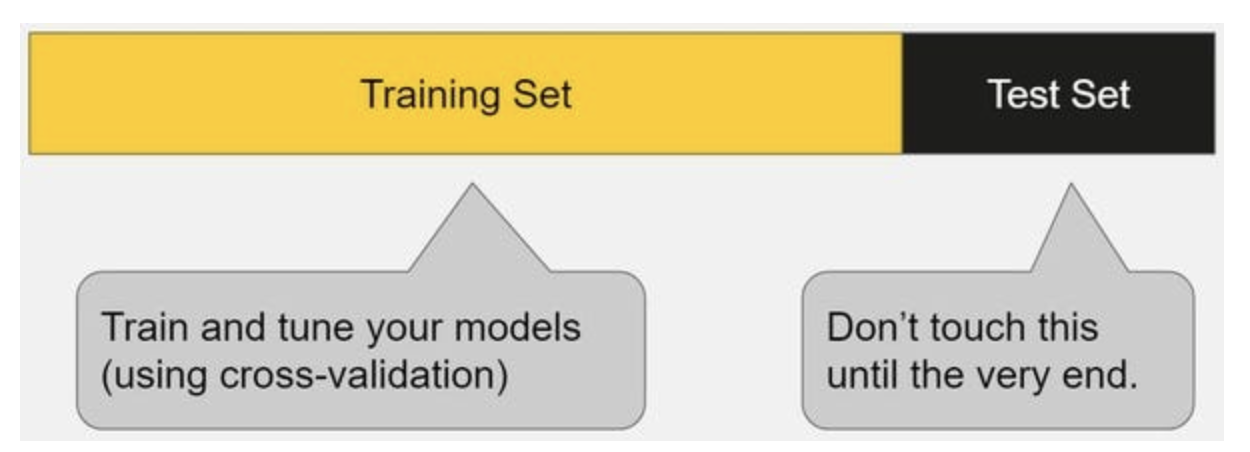

Let’s define our dependent and independent variables. Dependent will be Survived, because we want to predict whether a person is going to survive or not. Independent will be remaining variables. Given below is the code for the partition.

In [ ]:
# Define X and Y
X = data_final.drop(['Expensive'], axis=1)
Y = data_final['Expensive']

In [ ]:
X.head()

,MSZoning,Condition1,Heating,Street,CentralAir,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id
0,3,2,1,1,1,2,4,2,3,3,...,8,2003.0,548,61,0,0,0,2,2008,1
1,3,1,1,1,1,3,4,2,3,1,...,6,1976.0,460,0,0,0,0,5,2007,2
2,3,2,1,1,1,2,4,2,3,2,...,6,2001.0,608,42,0,0,0,9,2008,3
3,3,2,1,1,1,3,4,3,1,3,...,7,1998.0,642,35,272,0,0,2,2006,4
4,3,2,1,1,1,2,4,2,3,0,...,9,2000.0,836,84,0,0,0,12,2008,5


In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Expensive, dtype: int64

In [ ]:
# Data Splitting (Train - Test)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=23)

## 4.Applying algorithms

All the Machine Learning models are saved inside the package called sklearn (scikit-learn). We will be applying all the above listed models on the Processed Titanic Data Set and compare the accuracy score. First let us import all the algorithms.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
# initialize them in respective variables

LR = LogisticRegression()
KNN = KNeighborsClassifier()
NB = GaussianNB()
LSVM = LinearSVC()
NLSVM = SVC(kernel='rbf')
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
GB = GradientBoostingClassifier()

In [ ]:
# fit each model on the training set

LR_fit = LR.fit(X_train, Y_train)
KNN_fit = KNN.fit(X_train, Y_train)
NB_fit = NB.fit(X_train, Y_train)
LSVM_fit = LSVM.fit(X_train, Y_train)
NLSVM_fit = NLSVM.fit(X_train, Y_train)
DT_fit = DT.fit(X_train, Y_train)
RF_fit = RF.fit(X_train, Y_train)
GB_fit = GB.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# predict on the test set for each model

LR_pred = LR_fit.predict(X_test)
KNN_pred = KNN_fit.predict(X_test)
NB_pred = NB_fit.predict(X_test)
LSVM_pred = LSVM_fit.predict(X_test)
NLSVM_pred = NLSVM_fit.predict(X_test)
DT_pred = DT_fit.predict(X_test)
RF_pred = RF_fit.predict(X_test)
GB_pred = GB_fit.predict(X_test)

## 5.Comparing the accuracy scores

In [ ]:
from sklearn.metrics import accuracy_score

print("Logistic Regression is %f percent accurate" % (accuracy_score(LR_pred, Y_test)*100))
print("KNN is %f percent accurate" % (accuracy_score(KNN_pred, Y_test)*100))
print("Naive Bayes is %f percent accurate" % (accuracy_score(NB_pred, Y_test)*100))
print("Linear SVMs is %f percent accurate" % (accuracy_score(LSVM_pred, Y_test)*100))
print("Non Linear SVMs is %f percent accurate" % (accuracy_score(NLSVM_pred, Y_test)*100))
print("Decision Trees is %f percent accurate" % (accuracy_score(DT_pred, Y_test)*100))
print("Random Forests is %f percent accurate" % (accuracy_score(RF_pred, Y_test)*100))
print("Gradient Boosting is %f percent accurate" % (accuracy_score(GB_pred, Y_test)*100))

Logistic Regression is 91.095890 percent accurate
KNN is 90.753425 percent accurate
Naive Bayes is 90.410959 percent accurate
Linear SVMs is 92.465753 percent accurate
Non Linear SVMs is 84.589041 percent accurate
Decision Trees is 92.465753 percent accurate
Random Forests is 95.205479 percent accurate
Gradient Boosting is 94.863014 percent accurate


We can see that from above applications, **Random Forests** are giving the best results.